In [1]:
from jax import random, jit, vmap
import os
path = os.getcwd()
print("Old path:", path)
path = (path.split('/'))
path = path[:path.index("ABC-SBI")+1]
path = '/'.join(path)
print("New path:", path)
os.chdir(path)
from functions.simulation import get_dataset, get_epsilon_star, get_newdataset
from functions.training import train_loop
from functions.SBC import SBC_epsilon, plot_SBC, find_grid_explorative, post_pdf_z
import jax.numpy as jnp
import time
import pickle 
import lzma
from jax.scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pytensor

@jit
def prior_simulator(key):
    return random.normal(key, (1,))*SIGMA0 + MU0

@jit
def data_simulator(key, beta):
    key, key_betas= random.split(key)
    betas = jnp.insert(random.normal(key_betas, (N_VAR-1,))*SIGMA0 + MU0, INDEX_BETA, beta)
    return random.normal(key, (N_DATA,))*SIGMA + jnp.dot(X_DESIGN, betas)

@jit
def discrepancy(y, y_true):
    return jnp.mean((y-y_true)**2)

def x_design_simulator(key):
    return random.normal(key, (N_DATA, N_VAR))



Old path: /Users/antoineluciano/Documents/Recherche/ABC-SBI/examples/Linear-Reg
New path: /Users/antoineluciano/Documents/Recherche/ABC-SBI


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.




--------------------
SIGMA0 = 10.0, TRUE_BETA = max, ACCEPT_RATE = 1.0
--------------------


Selection of epsilon star...
Distances: min =  2.0651817 max =  3556.3115 mean =  413.29025 std =  345.52576
Time to select epsilon star: 1.64s

Simulations of the testing dataset...
Time to simulate the testing dataset: 2.15s

Simulations of the training dataset...
Time to simulate the training dataset: 36.84s

Training the neural network...
Initial accuracy: 49.44%, Initial test accuracy: 49.43%
Training for 100 epochs...
Epoch 1/100, mean train accuracy: 64.14%, mean test accuracy: 73.87%, lr scale: 1.0 in 19.06 sec
Epoch 2/100, mean train accuracy: 81.10%, mean test accuracy: 89.60%, lr scale: 1.0 in 19.15 sec
Epoch 3/100, mean train accuracy: 89.27%, mean test accuracy: 93.66%, lr scale: 1.0 in 20.27 sec
Epoch 4/100, mean train accuracy: 89.57%, mean test accuracy: 94.53%, lr scale: 1.0 in 20.95 sec
Epoch 5/100, mean train accuracy: 93.06%, mean test accuracy: 90.40%, lr scale: 1.0 in 1

  0%|          | 0/1600 [00:00<?, ?it/s]

Time to perform SBC: 140.12s

Data saved in  /Users/antoineluciano/Documents/Recherche/ABC-SBI/examples/Linear-Reg/results/K_10.0/beta_max/pickles/LinearReg_K_2_beta_max_acc_1.0_eps_inf.xz


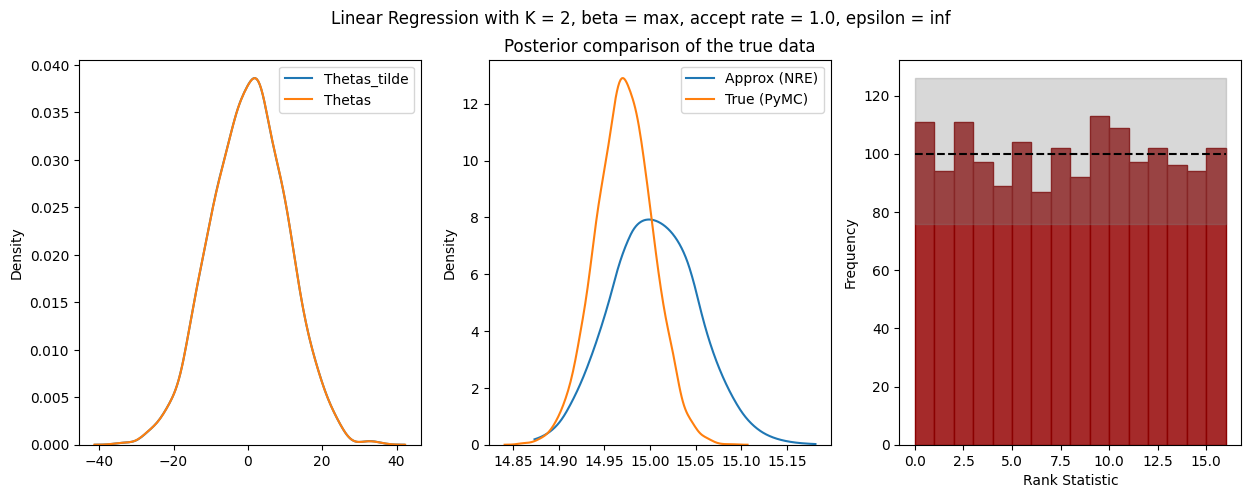



--------------------
ITERATION (ACC = 1.0) DONE IN 898.1009068489075 SECONDS!
--------------------




--------------------
SIGMA0 = 10.0, TRUE_BETA = max, ACCEPT_RATE = 0.999
--------------------


Selection of epsilon star...
Distances: min =  2.0546129 max =  2415.3086 mean =  413.00955 std =  344.37683
epsilon:  1529.8231201171875 acceptance rate:  0.9959
Time to select epsilon star: 1.79s

Simulations of the testing dataset...
Time to simulate the testing dataset: 2.48s

Simulations of the training dataset...
Time to simulate the training dataset: 123.73s

Training the neural network...
Initial accuracy: 49.99%, Initial test accuracy: 49.95%
Training for 100 epochs...
Epoch 1/100, mean train accuracy: 56.53%, mean test accuracy: 51.84%, lr scale: 1.0 in 13.71 sec
Epoch 2/100, mean train accuracy: 55.05%, mean test accuracy: 61.97%, lr scale: 0.5 in 13.19 sec
Epoch 3/100, mean train accuracy: 57.57%, mean test accuracy: 52.40%, lr scale: 0.5 in 13.05 sec
Epoch 4/100, mean train a

  0%|          | 0/1600 [00:00<?, ?it/s]

Time to perform SBC: 146.73s

Data saved in  /Users/antoineluciano/Documents/Recherche/ABC-SBI/examples/Linear-Reg/results/K_10.0/beta_max/pickles/LinearReg_K_2_beta_max_acc_0.999_eps_1.53e+03.xz


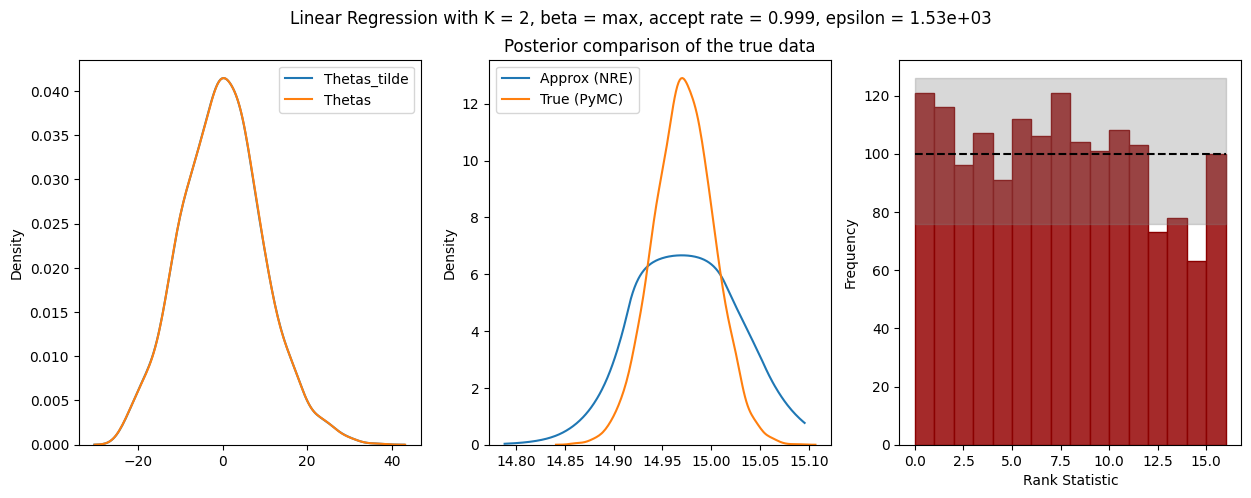



--------------------
ITERATION (ACC = 0.999) DONE IN 897.7243640422821 SECONDS!
--------------------




--------------------
SIGMA0 = 10.0, TRUE_BETA = max, ACCEPT_RATE = 0.99
--------------------


Selection of epsilon star...
epsilon:  1347.9844970703125 acceptance rate:  0.99179995
epsilon:  1239.8763427734375 acceptance rate:  0.9909
epsilon:  1164.1839599609375 acceptance rate:  0.9849
Time to select epsilon star: 5.19s

Simulations of the testing dataset...
Time to simulate the testing dataset: 3.22s

Simulations of the training dataset...
Time to simulate the training dataset: 171.76s

Training the neural network...
Initial accuracy: 49.98%, Initial test accuracy: 49.94%
Training for 100 epochs...
Epoch 1/100, mean train accuracy: 54.25%, mean test accuracy: 59.91%, lr scale: 1.0 in 12.71 sec
Epoch 2/100, mean train accuracy: 51.28%, mean test accuracy: 50.99%, lr scale: 0.5 in 12.54 sec
Epoch 3/100, mean train accuracy: 65.71%, mean test accuracy: 78.08%, lr scale: 0.5 in 13

  0%|          | 0/1600 [00:00<?, ?it/s]

Time to perform SBC: 134.52s

Data saved in  /Users/antoineluciano/Documents/Recherche/ABC-SBI/examples/Linear-Reg/results/K_10.0/beta_max/pickles/LinearReg_K_2_beta_max_acc_0.99_eps_1.16e+03.xz


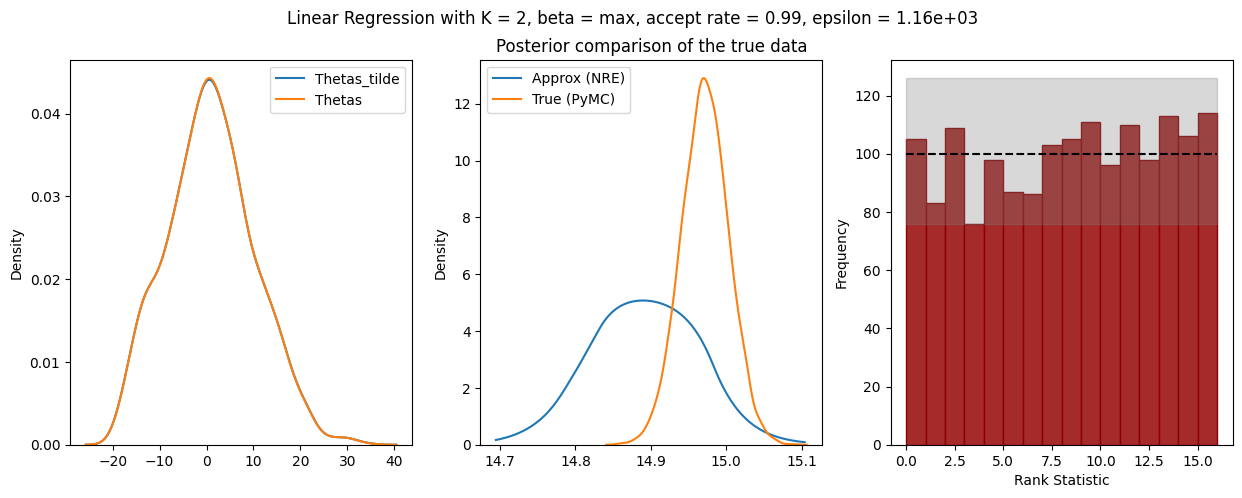



--------------------
ITERATION (ACC = 0.99) DONE IN 668.8354229927063 SECONDS!
--------------------




--------------------
SIGMA0 = 10.0, TRUE_BETA = max, ACCEPT_RATE = 0.975
--------------------


Selection of epsilon star...
epsilon:  1101.372802734375 acceptance rate:  0.98459995
epsilon:  1043.0084228515625 acceptance rate:  0.9824
epsilon:  996.2379150390625 acceptance rate:  0.9756
epsilon:  962.9559326171875 acceptance rate:  0.9784
epsilon:  929.977294921875 acceptance rate:  0.97419995
Time to select epsilon star: 6.15s

Simulations of the testing dataset...
Time to simulate the testing dataset: 2.46s

Simulations of the training dataset...


In [ ]:
import pymc as pm

key = random.PRNGKey(0)

N_DATA = 1000

MU0, SIGMA0 = 0., 10.
PRIOR_ARGS = [MU0, SIGMA0]

SIGMA = 1.



PRIOR_LOGPDF = lambda x: norm.logpdf(x, loc = MU0, scale = SIGMA0)
MINN, MAXX = norm.ppf(1e-5, loc = MU0, scale = SIGMA0), norm.ppf(1-1e-5, loc = MU0, scale = SIGMA0)
    



N_POINTS_TRAIN = 1000000
N_POINTS_TEST = 100000
N_POINTS_EPS = 10000
sim_args = None


N_EPOCHS = 100
LEARNING_RATE = 0.001
PATIENCE = 7
COOLDOWN = 0
FACTOR = .5
RTOL = 1e-4  
ACCUMULATION_SIZE = 200
LEARNING_RATE_MIN = 1e-6

BATCH_SIZE = 256
NUM_BATCH = 1024
NUM_CLASSES = 2
HIDDEN_SIZE = 256
NUM_LAYERS = 7
WDECAY = .001
N_GRID_FINAL = 10000
N_GRID_EXPLO = 1000
L = 15
B = 16
N_SBC = (L+1)*100

PATH_RESULTS = os.getcwd() + "/examples/Linear-Reg/results/"
if not os.path.exists(PATH_RESULTS):
    os.makedirs(PATH_RESULTS)
    


ACCEPT_RATES = [1., .999, .99, .975, .95, .925, .9, .85, .8, .75]

N_VARS = [2,3,5,10,25]
for N_VAR in N_VARS:
    
    key, key_beta = random.split(key)
    TRUE_BETAS = jnp.append(jnp.array([15.]), random.normal(key_beta, (N_VAR-2,))*5. + MU0)
    TRUE_BETAS = jnp.append(TRUE_BETAS, jnp.array([.1]))
    
    key, key_design = random.split(key)
    X_DESIGN = x_design_simulator(key_design)
    
    MODEL_ARGS = [SIGMA, X_DESIGN]
    key, key_data = random.split(key)
    TRUE_DATA = random.normal(key_data, (N_DATA,))*SIGMA + jnp.dot(X_DESIGN, TRUE_BETAS)

    PATH_N_VAR = PATH_RESULTS+ "K_{}/".format(SIGMA0)
    if not os.path.exists(PATH_N_VAR):
        os.makedirs(PATH_N_VAR)
    if N_VAR > 2:
        INDEX_BETAS = [0, N_VAR-1, N_VAR//2]
    else: 
        INDEX_BETAS = [0, N_VAR-1]
    for INDEX_BETA in INDEX_BETAS:
        TRUE_BETA = TRUE_BETAS[INDEX_BETA]

        if INDEX_BETA == 0:
            beta_mode = "max"
            PATH_BETA = PATH_N_VAR + "beta_max/"
        elif INDEX_BETA == N_VAR-1:
            beta_mode = "min"
            PATH_BETA = PATH_N_VAR + "beta_min/"
        else:
            beta_mode = "random"
            PATH_BETA = PATH_N_VAR + "beta_random/"
        if not os.path.exists(PATH_BETA):
            os.makedirs(PATH_BETA)
        
        trace_path = PATH_N_VAR + "post_pymc.pkl"
        if not os.path.exists(trace_path):
            with pm.Model() as model:
                # Convert X_DESIGN to a tensor variable
                X_DESIGN_shared = np.array(X_DESIGN)
                # Priors for unknown model parameters
                betas = pm.Normal('betas', mu=MU0, sigma=SIGMA0, shape=N_VAR)
                # Likelihood (sampling distribution) of observations
                y_obs = pm.Normal('y_obs', mu=pytensor.tensor.dot(X_DESIGN_shared, betas), sigma=SIGMA, observed=TRUE_DATA)
                # Sample from the posterior
                trace = pm.sample(1000, tune=1000)
                with open(trace_path, "wb") as f:
                    pickle.dump(trace, f)
        else:
            with open(trace_path, "rb") as f:
                trace = pickle.load(f)
        beta_post = np.array(trace.posterior.betas).reshape(-1, N_VAR)
        EPSILON_STAR = jnp.inf

        
        for ACCEPT_RATE in ACCEPT_RATES:
            print("\n\n--------------------")
            print("K = {}, TRUE_BETA = {}, ACCEPT_RATE = {}".format(N_VAR, beta_mode, ACCEPT_RATE))
            print("--------------------\n\n")
            
            time_eps = time.time()
            print("Selection of epsilon star...")
            EPSILON_STAR, key = get_epsilon_star(key, ACCEPT_RATE, N_POINTS_EPS, prior_simulator, data_simulator, discrepancy, TRUE_DATA, quantile_rate = .99, epsilon = EPSILON_STAR)
            print('Time to select epsilon star: {:.2f}s\n'.format(time.time()-time_eps))

            print("Simulations of the testing dataset...")
            time_sim = time.time()
            X_test, y_test, key = get_newdataset(key, N_POINTS_TEST, prior_simulator, data_simulator, discrepancy, EPSILON_STAR, TRUE_DATA)
            print('Time to simulate the testing dataset: {:.2f}s\n'.format(time.time()-time_sim))

            print("Simulations of the training dataset...")
            time_sim = time.time()
            X_train, y_train, key = get_newdataset(key, N_POINTS_TRAIN, prior_simulator, data_simulator, discrepancy, EPSILON_STAR, TRUE_DATA)
            print('Time to simulate the training dataset: {:.2f}s\n'.format(time.time()-time_sim))


            print("Training the neural network...")
            time_nn = time.time()
            params, train_accuracy, train_losses, test_accuracy, test_losses, key = train_loop(key, N_EPOCHS, NUM_LAYERS, HIDDEN_SIZE, NUM_CLASSES, BATCH_SIZE, NUM_BATCH, LEARNING_RATE, WDECAY, PATIENCE, COOLDOWN, FACTOR, RTOL, ACCUMULATION_SIZE, LEARNING_RATE_MIN, prior_simulator, data_simulator, discrepancy, true_data = TRUE_DATA, X_train = X_train, y_train = y_train, X_test = X_test, y_test =  y_test, N_POINTS_TRAIN = N_POINTS_TRAIN, N_POINTS_TEST = N_POINTS_TEST, epsilon = EPSILON_STAR, verbose = True)
            print('Time to train the neural network: {:.2f}s\n'.format(time.time()-time_nn))


            print("Simulation Based Calibration...")
            time_sbc = time.time()

            ranks, thetas_tilde, thetas, key = SBC_epsilon(key = key, N_SBC = N_SBC, L = L, params = params, epsilon = EPSILON_STAR, true_data = TRUE_DATA, prior_simulator = prior_simulator, prior_logpdf = PRIOR_LOGPDF, data_simulator = data_simulator, discrepancy = discrepancy, n_grid_explo = N_GRID_EXPLO, n_grid_final = N_GRID_FINAL, minn = MINN, maxx = MAXX)

            print('Time to perform SBC: {:.2f}s\n'.format(time.time()-time_sbc))


            pickle_dico = {"ACCEPT_RATE":ACCEPT_RATE, "ranks": ranks, "thetas_tilde": thetas_tilde, "thetas": thetas, "epsilon":EPSILON_STAR, "KEY":key, "N_SBC":N_SBC, "L":L, "N_GRID_EXPLO": N_GRID_EXPLO, 'N_GRID_FINAL': N_GRID_FINAL,"TRUE_DATA": TRUE_DATA, "TRUE_THETA": TRUE_BETA, "TRUE_BETAS": TRUE_BETAS, "params": params, "train_accuracy":train_accuracy, "test_accuracy":test_accuracy, "MODEL_ARGS":MODEL_ARGS, "PRIOR_ARGS":PRIOR_ARGS, "N_POINTS_TRAIN":N_POINTS_TRAIN, "N_POINTS_TEST":N_POINTS_TEST, "N_DATA":N_DATA, "N_EPOCHS":N_EPOCHS, "LEARNING_RATE":LEARNING_RATE, "PATIENCE":PATIENCE, "COOLDOWN":COOLDOWN, "FACTOR":FACTOR, "RTOL":RTOL, "ACCUMULATION_SIZE":ACCUMULATION_SIZE, "LEARNING_RATE_MIN":LEARNING_RATE_MIN, "BATCH_SIZE":BATCH_SIZE, "NUM_BATCH":NUM_BATCH, "NUM_CLASSES":NUM_CLASSES, "HIDDEN_SIZE":HIDDEN_SIZE, "NUM_LAYERS":NUM_LAYERS, "WDECAY":WDECAY}


            NAME = "LinearReg_K_{}_beta_{}_acc_{}_eps_{:.3}".format(N_VAR, beta_mode, ACCEPT_RATE, EPSILON_STAR)
            NAMEFIG = PATH_BETA + "figures/" + NAME + ".png"
            NAMEFILE = PATH_BETA + "pickles/" + NAME + ".xz"
            
            
            if not os.path.exists(PATH_BETA + "figures/"):
                os.makedirs(PATH_BETA + "figures/")
            if not os.path.exists(PATH_BETA + "pickles/"):
                os.makedirs(PATH_BETA + "pickles/")
                
            
            with lzma.open(NAMEFILE, "wb") as f:
                pickle.dump(pickle_dico, f)
            print("Data saved in ", NAMEFILE)

            title = "Linear Regression with K = {}, beta = {}, accept rate = {}, epsilon = {:.3}".format(N_VAR, beta_mode, ACCEPT_RATE, EPSILON_STAR)
    
            
            f, ax = plt.subplots(1,3, figsize = (15,5))
            sns.kdeplot(thetas_tilde, label = "Thetas_tilde", ax = ax[0])
            sns.kdeplot(thetas[:,0], label = "Thetas", ax = ax[0])

            ax[0].legend()
            f.suptitle(f'{title}')

            grid_approx, pdf_approx = find_grid_explorative(lambda x: post_pdf_z(params, x, TRUE_DATA, PRIOR_LOGPDF), N_GRID_EXPLO, N_GRID_FINAL, MINN, MAXX)

            
            Z_approx = np.trapz(pdf_approx, grid_approx)
            ax[1].plot(grid_approx, pdf_approx/Z_approx, label = "Approx (NRE)")
            sns.kdeplot(beta_post[:,INDEX_BETA], label = "True (PyMC)", ax = ax[1])
            # ax[1].plot(grid_true, pdf_true, label = "True")
            ax[1].legend()
            ax[1].set_title("Posterior comparison of the true data")
            plot_SBC(ranks, L, B, ax = ax[2])
            ax[2].set_title("SBC with Rank Statistics")
            f.savefig(NAMEFIG)
            plt.close(f)
            
            
            
            
            
            print("\n\n--------------------")
            print("ITERATION (ACC = {}) DONE IN {} SECONDS!".format(ACCEPT_RATE, time.time()-time_eps))
            print("--------------------\n\n")